In [6]:
import pandas as pd
import numpy as np
import missingno as ms
import seaborn as sns

Loading Dataset

In [3]:
data = pd.read_csv("./USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


Checking Null Values

<Axes: >

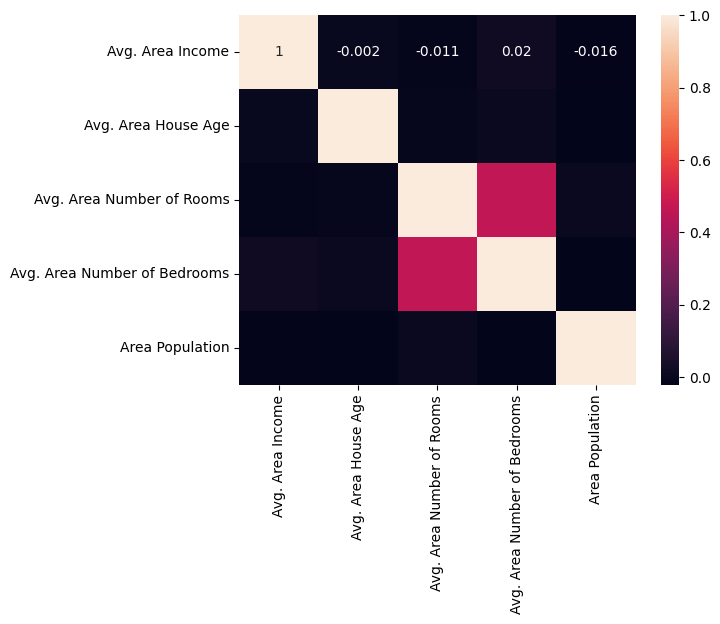

In [11]:
value =data.isnull().values.any()
value
# ms.bar(data)
sns.heatmap(data.iloc[:,0:5].corr(),annot=True)

Importing Decision Tree classifier,Kfold,cross_val_score from sklearn

In [22]:
from sklearn import linear_model,tree,ensemble
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler

Scaling the dataset and spliting of Data

In [17]:
X = data.iloc[:,0:5]
y = data.iloc[:,5]
y = np.array(y)
y=y.reshape(-1,1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.insert(X_scaled,0,values=1,axis=1)
X_scaled

[[1059033.558]
 [1505890.915]
 [1058987.988]
 ...
 [1030729.583]
 [1198656.872]
 [1298950.48 ]]


array([[ 1.        ,  1.02865969, -0.29692705,  0.02127433,  0.08806222,
        -1.31759867],
       [ 1.        ,  1.00080775,  0.02590164, -0.25550611, -0.72230146,
         0.40399945],
       [ 1.        , -0.68462915, -0.11230283,  1.5162435 ,  0.93084045,
         0.07240989],
       ...,
       [ 1.        , -0.48723454,  1.28447022, -2.17026949, -1.50025059,
        -0.29193658],
       [ 1.        , -0.05459152, -0.44669439,  0.14154061,  1.18205319,
         0.65111608],
       [ 1.        , -0.28831272,  0.01521477, -0.19434166,  0.07185495,
         1.04162464]])

Training the Dataset

In [28]:
X_train,X_test,y_train,test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

Scoring the model using Kfold

In [27]:
cv = KFold(n_splits=5,random_state=42,shuffle=True)
model = linear_model.LinearRegression()
scores = cross_val_score(model,X_scaled,y,cv=cv,scoring="neg_mean_absolute_error")
np.mean(np.absolute(scores))

81488.22529008756

Calculating B values

In [29]:
A = X_train.T.dot(X_train)
B = np.linalg.inv(A)
C= B.dot(X_train.T)
beta = C.dot(y_train)
print(beta)

[[1231278.63687691]
 [ 230464.52520478]
 [ 164159.19982569]
 [ 120514.71328324]
 [   2913.62424674]
 [ 151019.35865134]]
